In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from pickle import dump

In [2]:
df = pd.read_csv('data/Music_Features.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [4]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
class_encode=LabelEncoder()
y = class_encode.fit_transform(df.iloc[:,-1])

In [6]:
dict(zip(class_encode.classes_, class_encode.transform(class_encode.classes_)))

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [7]:
#features
print(df.iloc[:,:-1])

               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [8]:
df=df.drop(labels="filename",axis=1)
df=df.drop(labels="length",axis=1)
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [39]:
#scaling
from sklearn.preprocessing import StandardScaler
X=np.array(df.iloc[:,:-1],dtype=float)

In [40]:
# splitting 70% data into training set and the remaining 20% to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [41]:
center = StandardScaler().fit(X_train)
X_train = center.transform(X_train)
X_test = center.transform(X_test)

In [42]:
dump(center, open("scaler.pkl", "wb"))

In [43]:
train_dataloader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.int64)), batch_size = 256, shuffle = True)
dev_dataloader = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.int64)), batch_size = 256)

In [44]:
# We used different layers to train the neural network by importing keras library from tensorflow framework 
# for input and hidden neurons we use the most widly used activation function which is relu where as for output neurons we uses softmax activation function
model = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(X_train.shape[1], 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(32, 10),
)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()
train_losses, train_accs, val_losses, val_accs = [], [], [], []

for epoch in range(600):
    model.train()

    train_loss, train_acc = 0, 0

    for (X, y) in train_dataloader:
        outputs = model(X)
        optimizer.zero_grad()
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        train_loss += loss
        train_acc += torch.sum(torch.argmax(outputs, -1) == y)

    model.eval()

    val_loss, val_acc = 0, 0

    for (X, y) in dev_dataloader:
        outputs = model(X)
        loss = loss_fn(outputs, y)

        val_loss += loss
        val_acc += torch.sum(torch.argmax(outputs, -1) == y)

    train_loss, train_acc = train_loss / X_train.shape[0], train_acc / X_train.shape[0]
    val_loss, val_acc = val_loss / X_test.shape[0], val_acc / X_test.shape[0]

    train_losses.append(train_loss.detach().numpy())
    train_accs.append(train_acc.detach().numpy())
    val_losses.append(val_loss.detach().numpy())
    val_accs.append(val_acc.detach().numpy())

    print("Training loss: %.4f Training accuracy: %.4f Evaluation loss: %.4f Evaluation accuracy: %.4f"
          % (train_loss, train_acc, val_loss, val_acc))

Training loss: 0.0085 Training accuracy: 0.2297 Evaluation loss: 0.0070 Evaluation accuracy: 0.3440
Training loss: 0.0068 Training accuracy: 0.3768 Evaluation loss: 0.0058 Evaluation accuracy: 0.4528
Training loss: 0.0059 Training accuracy: 0.4543 Evaluation loss: 0.0052 Evaluation accuracy: 0.5125
Training loss: 0.0055 Training accuracy: 0.4996 Evaluation loss: 0.0048 Evaluation accuracy: 0.5592
Training loss: 0.0052 Training accuracy: 0.5364 Evaluation loss: 0.0045 Evaluation accuracy: 0.5879
Training loss: 0.0049 Training accuracy: 0.5634 Evaluation loss: 0.0042 Evaluation accuracy: 0.6453
Training loss: 0.0046 Training accuracy: 0.5920 Evaluation loss: 0.0039 Evaluation accuracy: 0.6627
Training loss: 0.0045 Training accuracy: 0.6129 Evaluation loss: 0.0038 Evaluation accuracy: 0.6777
Training loss: 0.0043 Training accuracy: 0.6421 Evaluation loss: 0.0036 Evaluation accuracy: 0.6880
Training loss: 0.0041 Training accuracy: 0.6515 Evaluation loss: 0.0034 Evaluation accuracy: 0.7100


In [51]:
torch.save(model.state_dict(), "weights")

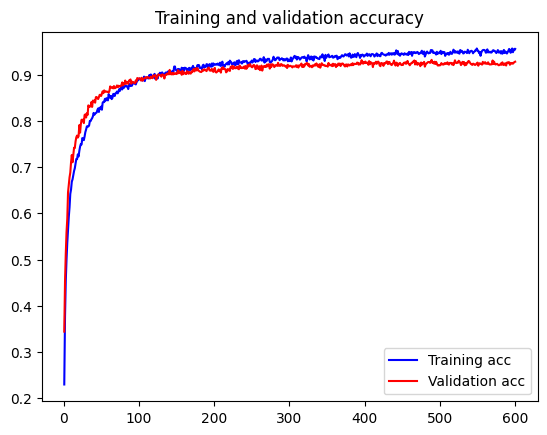

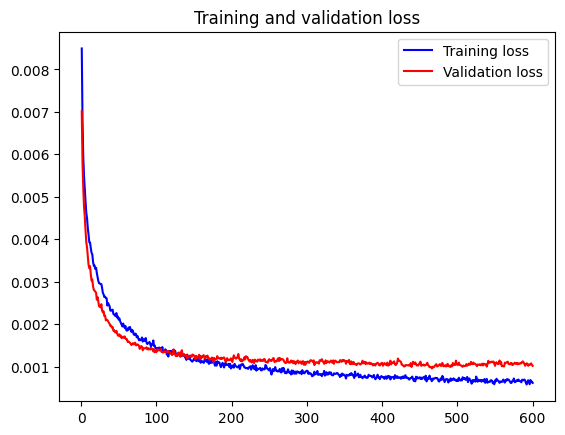

In [45]:
epochs = range(1, len(train_losses) + 1)

plt.plot(epochs, train_accs, 'b', label='Training acc')
plt.plot(epochs, val_accs, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
# Plotting the confusion matrix for analizing the true positives and negatives
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

pred_x_train = model(torch.tensor(X_train, dtype = torch.float32))
train_confusion = confusion_matrix(y_train,torch.argmax(pred_x_train, axis = 1))
print(train_confusion)

pred_x_test = model(torch.tensor(X_test, dtype = torch.float32))
test_confusion = confusion_matrix(y_test,torch.argmax(pred_x_test, axis = 1))
print(test_confusion)

[[685   0   0   0   0   0   0   0   0   0]
 [  0 734   0   0   0   0   0   0   0   0]
 [  0   0 691   0   0   0   0   0   0   0]
 [  0   0   0 692   0   0   0   0   0   0]
 [  0   0   0   0 707   0   0   0   0   0]
 [  0   0   0   0   0 704   0   0   0   0]
 [  0   0   0   1   0   0 682   0   0   4]
 [  0   0   0   0   0   0   0 712   0   0]
 [  0   0   0   0   0   0   0   0 714   0]
 [  0   0   0   0   0   0   0   0   0 667]]
[[300   0   2   0   1   5   0   0   3   4]
 [  0 251   2   0   0  11   0   0   0   0]
 [  4   2 279   2   1   6   0   3   6   3]
 [  0   0   4 287   0   3   2   4   0   7]
 [  1   3   3   3 269   0   2   3   4   3]
 [  3   6   3   0   0 281   0   0   2   1]
 [  2   0   0   7   2   0 291   0   0  11]
 [  0   0   0   9   1   2   0 271   4   1]
 [  1   1   2   4   3   2   0   2 268   3]
 [  1   0  12  15   1   4   8   2   4 284]]
